In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import uns
%aimport uns
import pandas as pd
import os

tr = pd.read_msgpack('trainvalidate.bin')

folder = '/home/chrisv/code/train_output'
pattern = os.path.join(folder, '{}_prediction.npy')



In [5]:
batch = uns.batch(tr, pred=pattern)

/home/chrisv/.conda/envs/tensorflow/lib/python3.5/site-packages/skimage/external/tifffile/tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


ImportError: No module named 'reload'

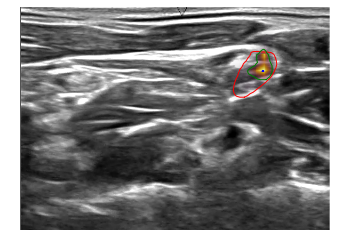

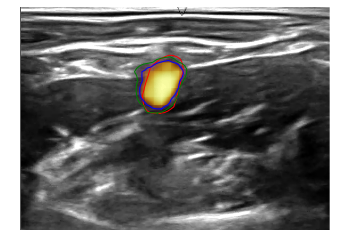

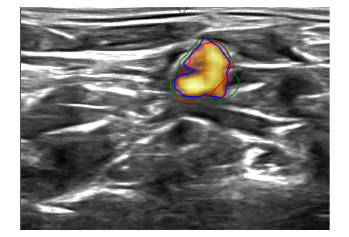

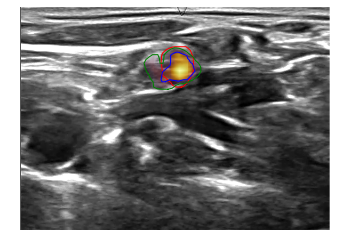

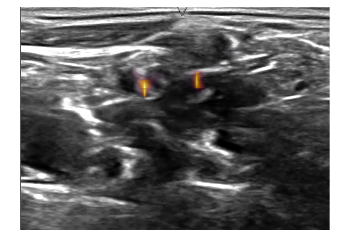

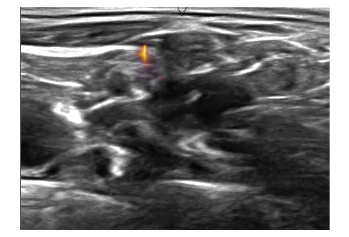

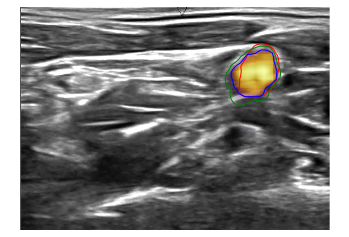

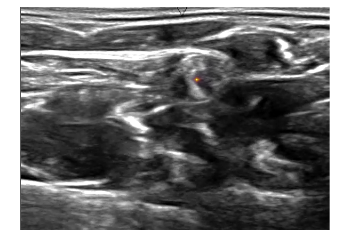

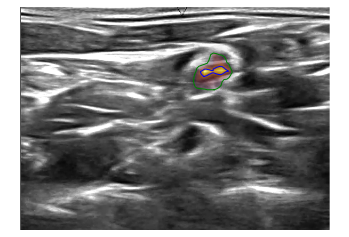

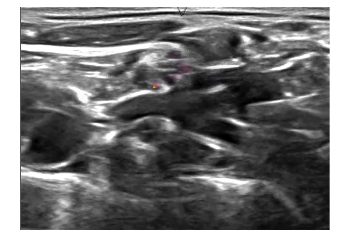

In [10]:
for im in batch[:10]:
    im.new_prediction('cutoff50', lambda x:x>0.5)
    im.new_prediction('cutoff20', lambda x:x>0.2)
    im.plot_heatmap()

In [7]:
scores = []
pixels = []
i=0
while batch:
    im = batch.pop(0)
    im.new_prediction('cutoff30', lambda x:x>0.3)
    im.blank_prediction()
    
    pix = np.count_nonzero(im.predmasks['cutoff30'].image)
    pixels.append(pix)
    
    scores.append(im.scores)
    i+=1
    if i%100 == 0:
        Sc = np.array([s['cutoff30'] for s in scores])
        Bl = np.array([s['blank'] for s in scores])
        Px = np.array(pixels)
        Scf = np.where(Px>300, Sc, Bl)
        print('{:d}, {:.2f}, {:2f}'.format(i, np.mean(Sc), np.mean(Scf)))

100, 0.82, 0.890738
200, 0.77, 0.843991
300, 0.77, 0.816814
400, 0.75, 0.805186
500, 0.75, 0.799920
600, 0.75, 0.799505
700, 0.75, 0.799235
800, 0.74, 0.784073
900, 0.73, 0.779577
1000, 0.72, 0.768941
1100, 0.70, 0.749939
1200, 0.70, 0.750410
1300, 0.70, 0.751192
1400, 0.69, 0.747743
1500, 0.69, 0.746769
1600, 0.69, 0.746418
1700, 0.68, 0.738905
1800, 0.69, 0.741050
1900, 0.69, 0.745277
2000, 0.69, 0.744744
2100, 0.69, 0.743167
2200, 0.68, 0.738529
2300, 0.68, 0.738097
2400, 0.68, 0.741473
2500, 0.68, 0.743531
2600, 0.68, 0.744703
2700, 0.68, 0.744547
2800, 0.68, 0.744978
2900, 0.68, 0.743851
3000, 0.68, 0.742362
3100, 0.68, 0.744052
3200, 0.68, 0.744701
3300, 0.68, 0.743030
3400, 0.68, 0.741814
3500, 0.68, 0.739806
3600, 0.67, 0.737723
3700, 0.67, 0.734940
3800, 0.67, 0.735444
3900, 0.68, 0.738565
4000, 0.67, 0.737223
4100, 0.67, 0.734804
4200, 0.67, 0.732624
4300, 0.67, 0.733467
4400, 0.67, 0.733375
4500, 0.67, 0.736137
4600, 0.68, 0.741015
4700, 0.68, 0.744809
4800, 0.68, 0.746452
4

In [21]:
np.mean([k['cutoff50'] for k in scores])

0.73315509870002016

In [27]:
A = im.predmasks['cutoff50']

3710